In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

#alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 

#dataset['label'] = dataset['label'].map(alphabets_mapper)

print(dataset.head(100000))
print(dataset.shape)
dataset = dataset.set_index("label")
dataset = dataset.drop(0, axis=0)
dataset = dataset.drop(11, axis=0)
dataset = dataset.drop(12, axis=0)
dataset = dataset.drop(13, axis=0)
dataset = dataset.drop(14, axis=0)
dataset = dataset.drop(15, axis=0)
dataset = dataset.drop(16, axis=0)
dataset = dataset.drop(17, axis=0)
dataset = dataset.drop(18, axis=0)
dataset = dataset.drop(19, axis=0)
dataset = dataset.drop(20, axis=0)
dataset = dataset.drop(21, axis=0)
dataset = dataset.drop(22, axis=0)
dataset = dataset.drop(23, axis=0)
dataset = dataset.drop(24, axis=0)
dataset = dataset.drop(25, axis=0)

print(dataset.shape)

       label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
99995   11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
99996   11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
99997   11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
99998   11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
99999   11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

       0.641  0.642  0.643  0.644  0.64

In [4]:
print(dataset.head(1))
dataset=dataset.reset_index(drop=False)
print(dataset.head(1))
X = dataset.drop('label',axis = 1)
y = dataset['label']
print(dataset.head(5))

       0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
label                                                     ...                 
1.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

       0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
label                                                          
1.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[1 rows x 784 columns]
   label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[1 rows x 785 columns]
   label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2    1.0  0.0  0.0  0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

    
# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print(y_test)
 #for i in range(len(y_test)):
    #changement(y_test[i])

print(y_test.shape)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


55609    6.0
1331     1.0
34737    3.0
7353     1.0
24464    2.0
        ... 
53657    5.0
41029    3.0
38624    3.0
33209    3.0
45080    4.0
Name: label, Length: 24903, dtype: float64
(24903,)


In [6]:
print(np.shape(y_train))
print(np.shape(X_train))

(58107, 11)
(58107, 28, 28, 1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               321152

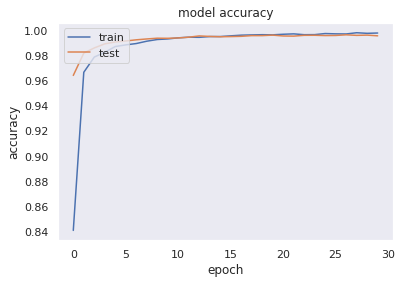

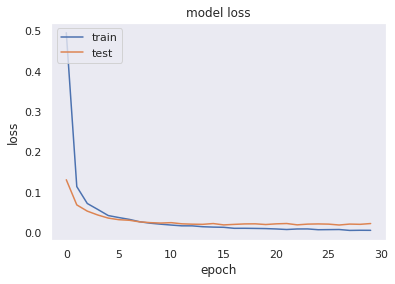

In [7]:
from tensorflow.keras.optimizers import SGD
import time
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution1D,MaxPooling1D, Convolution2D, MaxPooling2D, Input



def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show()


# Define model architecture
inputs = Input(shape=(28,28,1)) 
x = inputs 
filtre32=Convolution2D(32,(3,3), activation='relu',padding='same')(x)
filtre64=Convolution2D(64,(3,3), activation='relu',padding='same')(filtre32)
dropout1=Dropout(0.25)(filtre64)
p= MaxPooling2D(pool_size=2, strides=2,padding='same')(dropout1)
f=Flatten()(p) 

couche=Dense(256,activation='relu')(f)
dropout=Dropout(0.5)(couche)
outputs=Dense(11, activation='softmax')(dropout) 
model = Model(inputs, outputs) 

model.summary()
lr=0.1 
batch_size=1024
epochs=30
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                   verbose=1,validation_data=(X_test, y_test)) 
tps2 = time.clock()
affiche(history) 

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)

# Print Metrics
print (score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

779/779 [==============================] - 2s 3ms/step - loss: 0.0229 - accuracy: 0.9957
[0.02287624590098858, 0.9957435131072998]
Test loss: 0.02287624590098858
Test accuracy: 0.9957435131072998
